In [1]:
#|hide
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import*

In [3]:
train_path = "D:/Downloads/pizzavsice/dataset/train"

In [13]:
files = get_image_files(train_path)
len(files)

716

In [14]:
def pizza_vs_ice(x): return "pizza" if x[:5]=='pizza' else 'ice cream'

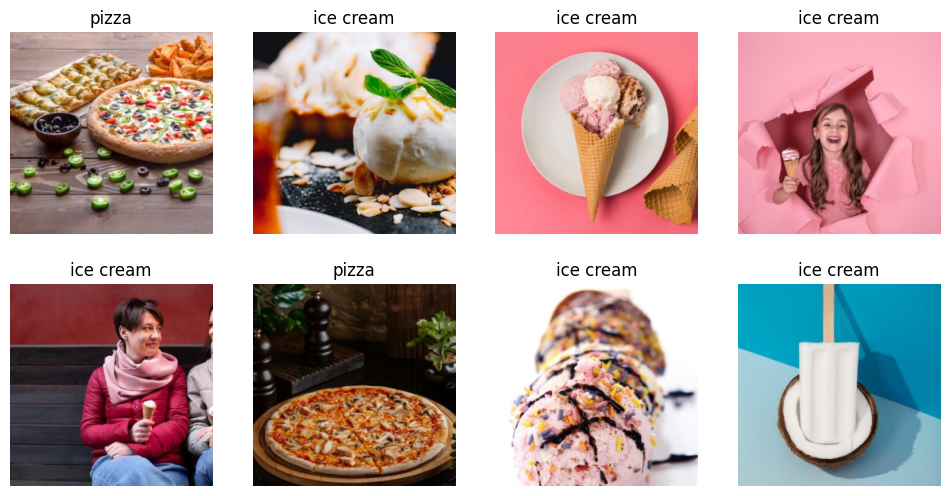

In [15]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(train_path), valid_pct=0.2, seed=42,
    label_func=pizza_vs_ice,
    item_tfms=Resize(256))

dls.show_batch(max_n=8)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(9)

epoch,train_loss,valid_loss,error_rate,time
0,0.736544,0.141193,0.041958,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.148778,0.074081,0.034965,00:04
1,0.103076,0.053770,0.013986,00:04
2,0.071760,0.033741,0.020979,00:04
3,0.058168,0.064903,0.020979,00:04
4,0.053778,0.063069,0.020979,00:04
5,0.044353,0.053206,0.020979,00:04
6,0.040047,0.040020,0.013986,00:04
7,0.032564,0.038188,0.013986,00:04
8,0.027915,0.034906,0.013986,00:04


In [19]:
learn.export('model.pkl')